In [1]:
from pathlib import Path
import shutil

import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_dir = Path.cwd().parent / "coco"
image_dir = data_dir / "images"
label_dir = data_dir / "labels"


In [3]:
classes = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
           'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
           'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
           'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
           'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
           'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
           'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
           'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
           'hair drier', 'toothbrush']

In [4]:
for i, name in enumerate(classes):
    print(i, name)

0 person
1 bicycle
2 car
3 motorcycle
4 airplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 stop sign
12 parking meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports ball
33 kite
34 baseball bat
35 baseball glove
36 skateboard
37 surfboard
38 tennis racket
39 bottle
40 wine glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot dog
53 pizza
54 donut
55 cake
56 chair
57 couch
58 potted plant
59 bed
60 dining table
61 toilet
62 tv
63 laptop
64 mouse
65 remote
66 keyboard
67 cell phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy bear
78 hair drier
79 toothbrush


In [5]:
id = "000000000139"
with open(label_dir / "val2017" / f"{id}.txt", "r") as infile:
    boxes = [line.strip().split(" ") for line in infile.readlines()]

In [6]:
for i, _ in enumerate(boxes):
    boxes[i][1:] = map(float, boxes[i][1:])

In [7]:
boxes

[['58', 0.389578, 0.416103, 0.038594, 0.163146],
 ['62', 0.127641, 0.505153, 0.233312, 0.2227],
 ['62', 0.934195, 0.583462, 0.127109, 0.184812],
 ['56', 0.604656, 0.632547, 0.0875, 0.241385],
 ['56', 0.502508, 0.627324, 0.096609, 0.231174],
 ['56', 0.669195, 0.618991, 0.047141, 0.190986],
 ['56', 0.512797, 0.528251, 0.033719, 0.027207],
 ['0', 0.686445, 0.53196, 0.082891, 0.323967],
 ['0', 0.612484, 0.446197, 0.023625, 0.083897],
 ['68', 0.811859, 0.501725, 0.023031, 0.037488],
 ['72', 0.78632, 0.536373, 0.031703, 0.254249],
 ['73', 0.956156, 0.771702, 0.022406, 0.1073],
 ['73', 0.96825, 0.778075, 0.020125, 0.109014],
 ['74', 0.710555, 0.31, 0.021828, 0.051362],
 ['75', 0.886562, 0.831608, 0.057313, 0.210493],
 ['75', 0.556945, 0.516702, 0.017766, 0.052934],
 ['56', 0.651664, 0.528826, 0.015047, 0.02939],
 ['75', 0.388047, 0.478415, 0.022219, 0.041385],
 ['75', 0.533836, 0.487946, 0.015203, 0.039272],
 ['60', 0.599984, 0.647148, 0.196188, 0.208756]]

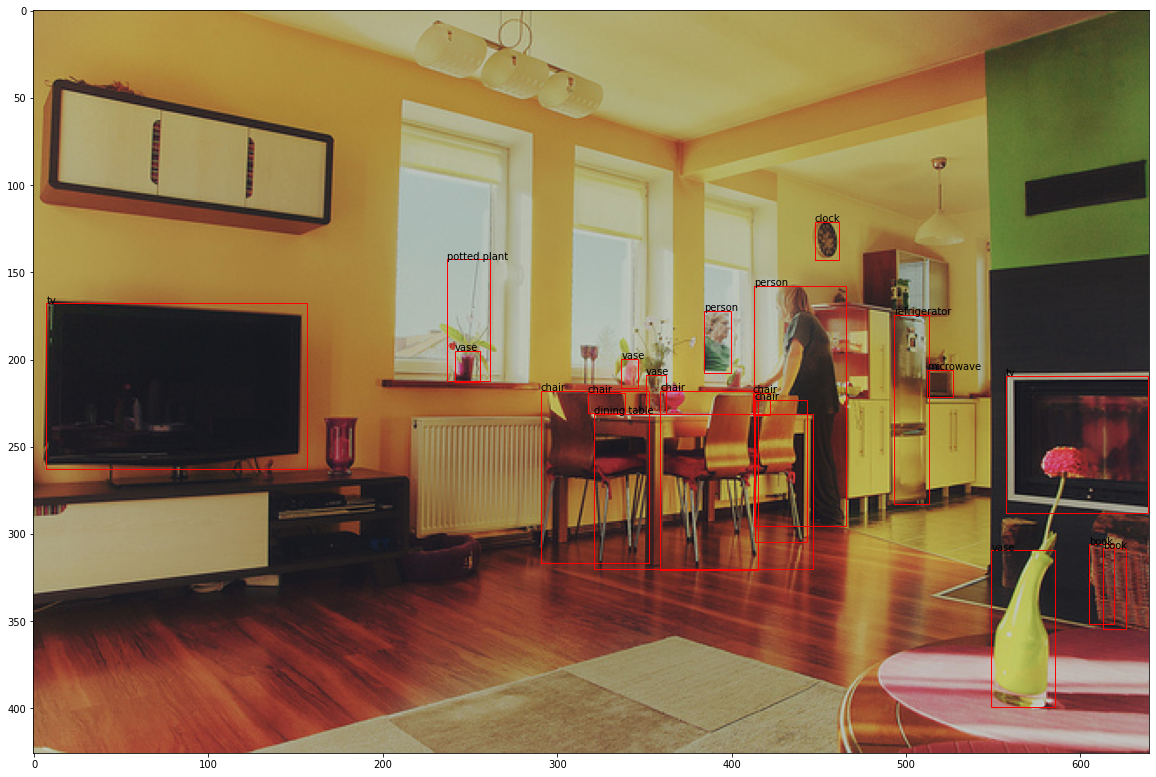

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
image = cv2.imread(str(image_dir / "val2017" / f"{id}.jpg"))[:, :, ::-1]
img_h, img_w = image.shape[:-1]
for (label, x, y, w, h) in boxes:
    x_min = (x - w / 2) * img_w
    y_min = (y - h / 2) * img_h
    rect = patches.Rectangle((x_min, y_min), w * img_w, h * img_h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.annotate(classes[int(label)], xy=(x_min, y_min))
ax.imshow(image)


In [16]:
from pycocotools.coco import COCO

converted_class = ["apple", "banana", "orange", "wheelchair", "wok"]

converted_data_dir = Path.cwd().parent / "coco_converted"
converted_image_dir = converted_data_dir / "images"
converted_label_dir = converted_data_dir / "labels"
converted_data_dir.mkdir(parents=True, exist_ok=True)
converted_image_dir.mkdir(parents=True, exist_ok=True)
converted_label_dir.mkdir(parents=True, exist_ok=True)

## Val set

In [17]:
coco = COCO(data_dir / "annotations" / "instances_val2017.json")
cats = coco.loadCats(coco.getCatIds())

cats_to_convert = ["apple", "banana", "orange"]
img_ids = []
for cat in cats_to_convert:
    cat_ids = coco.getCatIds(catNms=[cat])
    img_ids.extend(coco.getImgIds(catIds=cat_ids))
img_ids = np.unique(img_ids)

loading annotations into memory...
Done (t=1.00s)
creating index...
index created!


In [18]:
val_image_dir = converted_image_dir / "val"
val_label_dir = converted_label_dir / "val"
val_image_dir.mkdir(parents=True, exist_ok=True)
val_label_dir.mkdir(parents=True, exist_ok=True)

In [19]:
for img_id in img_ids:
    image_filename = f"{img_id:012}.jpg"
    shutil.copy(image_dir / "val2017" / image_filename, val_image_dir / image_filename)

    label_filename = f"{img_id:012}.txt"
    with open(label_dir / "val2017" / label_filename, "r") as infile, open(
        val_label_dir / label_filename, "w"
    ) as outfile:
        boxes = [line.strip().split(" ") for line in infile.readlines()]
        for box in boxes:
            if classes[int(box[0])] in cats_to_convert:
                outfile.write(f"{' '.join([str(converted_class.index(classes[int(box[0])]))] + box[1:])}\n")


## Train set

In [20]:
coco = COCO(data_dir / "annotations" / "instances_train2017.json")
cats = coco.loadCats(coco.getCatIds())

cats_to_convert = ["apple", "banana", "orange"]
img_ids = []
for cat in cats_to_convert:
    cat_ids = coco.getCatIds(catNms=[cat])
    img_ids.extend(coco.getImgIds(catIds=cat_ids))
img_ids = np.unique(img_ids)

loading annotations into memory...
Done (t=20.49s)
creating index...
index created!


In [21]:
train_image_dir = converted_image_dir / "train"
train_label_dir = converted_label_dir / "train"
train_image_dir.mkdir(parents=True, exist_ok=True)
train_label_dir.mkdir(parents=True, exist_ok=True)

In [22]:
for img_id in img_ids:
    image_filename = f"{img_id:012}.jpg"
    shutil.copy(image_dir / "train2017" / image_filename, train_image_dir / image_filename)

    label_filename = f"{img_id:012}.txt"
    with open(label_dir / "train2017" / label_filename, "r") as infile, open(
        train_label_dir / label_filename, "w"
    ) as outfile:
        boxes = [line.strip().split(" ") for line in infile.readlines()]
        for box in boxes:
            if classes[int(box[0])] in cats_to_convert:
                outfile.write(f"{' '.join([str(converted_class.index(classes[int(box[0])]))] + box[1:])}\n")
